In [27]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt



### Download an Iris Dataset 

In [28]:
# Download the Iris Dataset from the website, then load it into a pandas DataFrame

import urllib

# Download the data set over http
iris_http_handle = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

# Load the data set into a DataFrame
# read_csv likes reading from a file handle, which is 
iris_df = pd.read_csv(iris_http_handle, \
                      sep=',', \
                      header=None, \
                      names=['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'iris'])

# Show the first few lines of the DataFrame to show it got loaded nicely in the data frame
iris_df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Take a look at the Iris dataframe

In [29]:
# you can create a new DataFrame with just some columns
iris_df.head() 

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Inspect the Iris dataset dimensions

In [30]:
# Number of rows
print("Number of Rows: ",len(iris_df))

print("Iris Types: ",format(iris_df['iris'].unique()))

Number of Rows:  150
Iris Types:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### Plotting the Iris Data
There are four measurements in the Iris dataset: 
* sepallength 
* sepalwidth 
* petallength
* petalwidth  

We can use pandas to make some quick histrogram plots of this data.

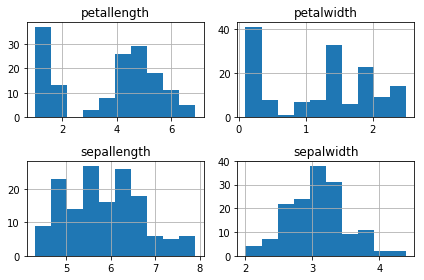

In [31]:
# Plot the distribution of sepal/petal measurements
iris_df.hist()

# A helpful bit of matplotlib clean up our plots
plt.tight_layout()

### Look at the relationship between two parameters

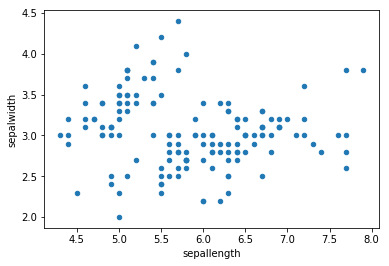

In [84]:
# Pandas make it really easy to make simple plots

#iris_df.plot(x='sepallength', y='petallength', kind='scatter')

iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter')

#iris_df.plot(x='petallength', y='petalwidth', kind='scatter')

Visual inspection would suggest two clustering grouping.

Use the k-means clustering algorithm to preform unsupervised clustering of the data.  Let's start by clustering based on the sepal width and length data.

In [33]:
from sklearn.cluster import KMeans

# Subset the Iris dataframe for the the variables we want do the cluster analysis on
df_tr_std = iris_df[['sepallength','sepalwidth']]

# Train the cluster algorithm.  We know there are 3 types of Iris in this dataset 
# so we tell KMeans to assume 3 thee total clusters.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)

# KMeans returns a KMeans object that has be trained to cluster data based on the
#  input dataset: df_tr_std  

# In order to see how KMeans clustered df_tr_std, we feed the values back into the trained
#  kmeans algorithm but in the predict mode.
kmeans_labels = kmeans.predict(df_tr_std)

# Save this back into the Iris dataframe
iris_df['k_label'] = kmeans_labels 

### Plot the results of K-Means Clustering

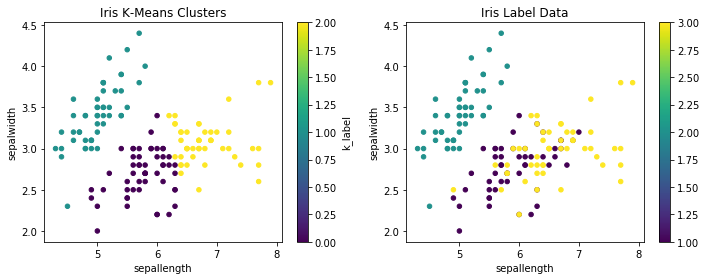

In [83]:
# I going to use a little bit of matplotlib code to have more control over 
# the pandas plotting

# Setup a plotting area, allowing for subplots
fig, axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)

# plot the sepal length vs. with, color coded based on the K-Means clustering 
iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter',c='k_label', cmap='viridis',
            title='Iris K-Means Clusters',ax=axes[0])


# I need to make a color map to make the dots show up in the right colors
color_map = {'Iris-setosa': 2, 'Iris-versicolor' : 1, 'Iris-virginica' : 3}
colors_s = iris_df['iris'].map(lambda x : color_map[x])


# plot the sepal length vs. with, color coded based on the defined Iris label
iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter',c=colors_s, cmap='viridis', 
             title='Iris Label Data',ax=axes[1])



plt.tight_layout()

The K-mean algorithm isn't limited to 2-D data.  We can run the k-means clustering on all four parameters.

In [69]:
from sklearn.cluster import KMeans
#kmeans = KMeans(n_clusters=2)
#kmeans.fit(X)
#y_kmeans = kmeans.predict(X)

df_tr_std = iris_df[['petallength','petalwidth','sepallength','sepalwidth']]

# Train KMeans on all 4 parameters
kmeansAll = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)

# Get the cluster labels for our data
kmeansAll_labels = kmeansAll.predict(df_tr_std)

# Save this back into the Iris dataframe
iris_df['kAll_label'] = kmeansAll_labels 

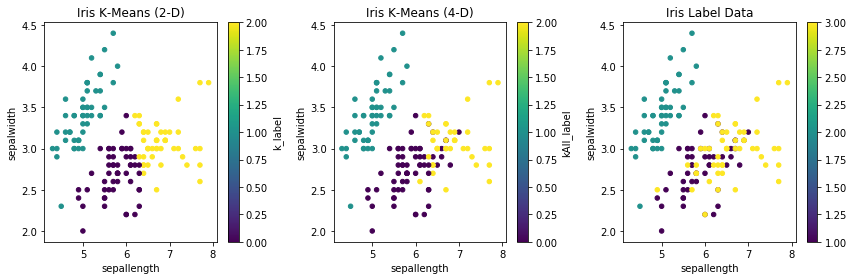

In [81]:
# I going to use a little bit of matplotlib code to have more control over 
# the pandas plotting

# Setup a plotting area, allowing for subplots
fig, axes = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)

# plot the sepal length vs. with, color coded based on the K-Means clustering (2-D)
iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter',c='k_label', cmap='viridis',
            title='Iris K-Means (2-D)',ax=axes[0])


# plot the sepal length vs. with, color coded based on the K-Means clustering (All data)
iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter',c='kAll_label', cmap='viridis',
            title='Iris K-Means (4-D)',ax=axes[1])


# I need to make a color map to make the dots show up in the right colors
color_map = {'Iris-setosa': 2, 'Iris-versicolor' : 1, 'Iris-virginica' : 3}
colors_s = iris_df['iris'].map(lambda x : color_map[x])


# plot the sepal length vs. with, color coded based on the defined Iris label
iris_df.plot(x='sepallength', y='sepalwidth', kind='scatter',c=colors_s, cmap='viridis', 
             title='Iris Label Data',ax=axes[2])


plt.tight_layout()